In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE=256
CHANNELS=3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 5303 images belonging to 5 classes.


In [3]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.62983966 0.6023887  0.6337612 ]
  [0.63125306 0.6038021  0.63517463]
  [0.6326666  0.6052156  0.63658816]
  ...
  [0.6745098  0.627451   0.6666667 ]
  [0.67889065 0.6318318  0.6710475 ]
  [0.6889221  0.6418633  0.681079  ]]

 [[0.6228585  0.59540755 0.6267801 ]
  [0.62137073 0.59391975 0.6252923 ]
  [0.6198828  0.59243184 0.6238044 ]
  ...
  [0.6745098  0.627451   0.6666667 ]
  [0.6790394  0.6319806  0.6711963 ]
  [0.68914527 0.6420864  0.6813021 ]]

 [[0.62859666 0.6011457  0.63251823]
  [0.63023335 0.60278237 0.6341549 ]
  [0.63187    0.604419   0.63579154]
  ...
  [0.6745098  0.627451   0.6666667 ]
  [0.67918825 0.63212943 0.6713451 ]
  [0.6893684  0.6423096  0.6815253 ]]

 ...

 [[0.3613952  0.30257165 0.33002263]
  [0.3633985  0.30457497 0.33202595]
  [0.3730464  0.31422284 0.34167385]
  ...
  [0.4894379  0.41492808 0.4384575 ]
  [0.48958665 0.41507685 0.43860626]
  [0.48973545 0.41522563 0.43875504]]

 [[0.36050248 0.30167896 0.32912993]
  [0.36481196 0.30598843 0.3334394 ]


In [4]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 756 images belonging to 5 classes.


In [5]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 1520 images belonging to 5 classes.


In [6]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=5
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

c:\Users\Vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\Vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,877 (718.27 KB)

 Trainable params: 183,877 (718.27 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
756/32

23.625

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=166, #5303/32
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=24, #756/32
    epochs=25,
)

c:\Users\Vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 150s 889ms/step - accuracy: 0.4158 - loss: 1.3668 - val_accuracy: 0.7394 - val_loss: 0.6667
Epoch 2/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 140s 845ms/step - accuracy: 0.7770 - loss: 0.6075 - val_accuracy: 0.8651 - val_loss: 0.4042
Epoch 3/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 140s 843ms/step - accuracy: 0.8530 - loss: 0.4033 - val_accuracy: 0.8810 - val_loss: 0.3450
Epoch 4/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 142s 856ms/step - accuracy: 0.8509 - loss: 0.4016 - val_accuracy: 0.8651 - val_loss: 0.3534
Epoch 5/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 141s 847ms/step - accuracy: 0.8660 - loss: 0.3408 - val_accuracy: 0.8849 - val_loss: 0.2905
Epoch 6/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 143s 862ms/step - accuracy: 0.8943 - loss: 0.2784 - val_accuracy: 0.9101 - val_loss: 0.2715
Epoch 7/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 133s 801ms/step - accuracy: 0.9069 - loss: 0.2583 - val_accuracy: 0.8796 - val_loss: 0.3076
Epoch 8/25
166/166 ━━━━━━━━━━━━━━━━━━━━ 133s 801ms/step - accuracy: 0.9133 -

In [12]:
scores = model.evaluate(test_generator)

c:\Users\Vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - accuracy: 0.9550 - loss: 0.4365


In [13]:
scores

[0.3108729124069214, 0.9578947424888611]

In [14]:
history

In [15]:
history.params

{'verbose': 'auto', 'epochs': 25, 'steps': 166}

In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

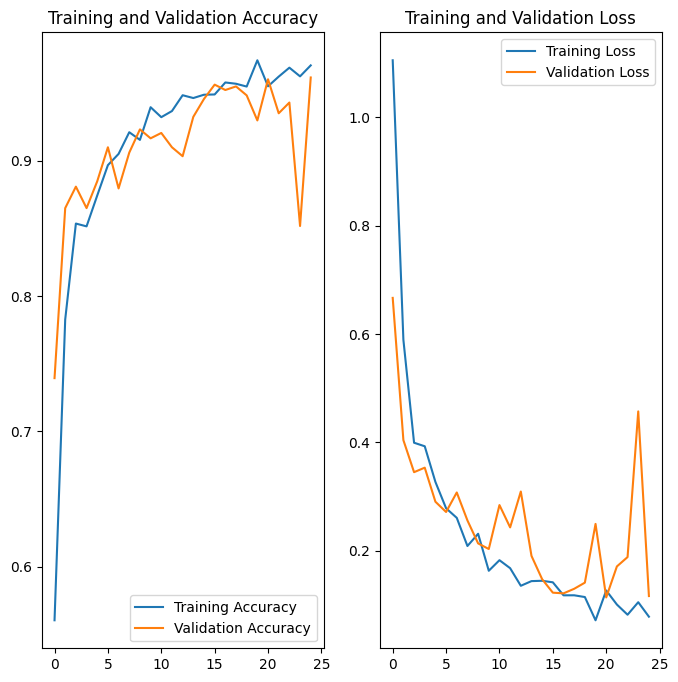

In [18]:
EPOCHS=25
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [19]:
np.argmax([9.9998784e-01,1.2109381e-05,2.0071200e-14])

0

In [22]:
class_names=['Tomato_Bacterial_spot','Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight','Tomato_Leaf_Mold']

first image to predict
actual label: Tomato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
predicted label: Tomato_Late_blight


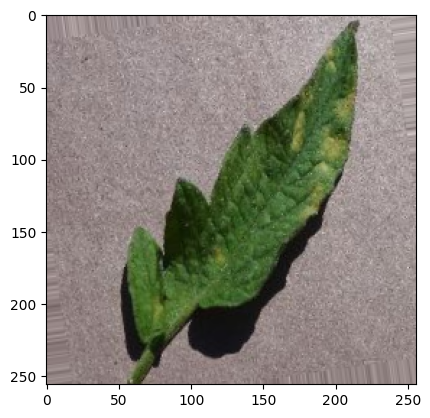

In [23]:
for images_batch, labels_batch in test_generator:
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

In [24]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images)
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


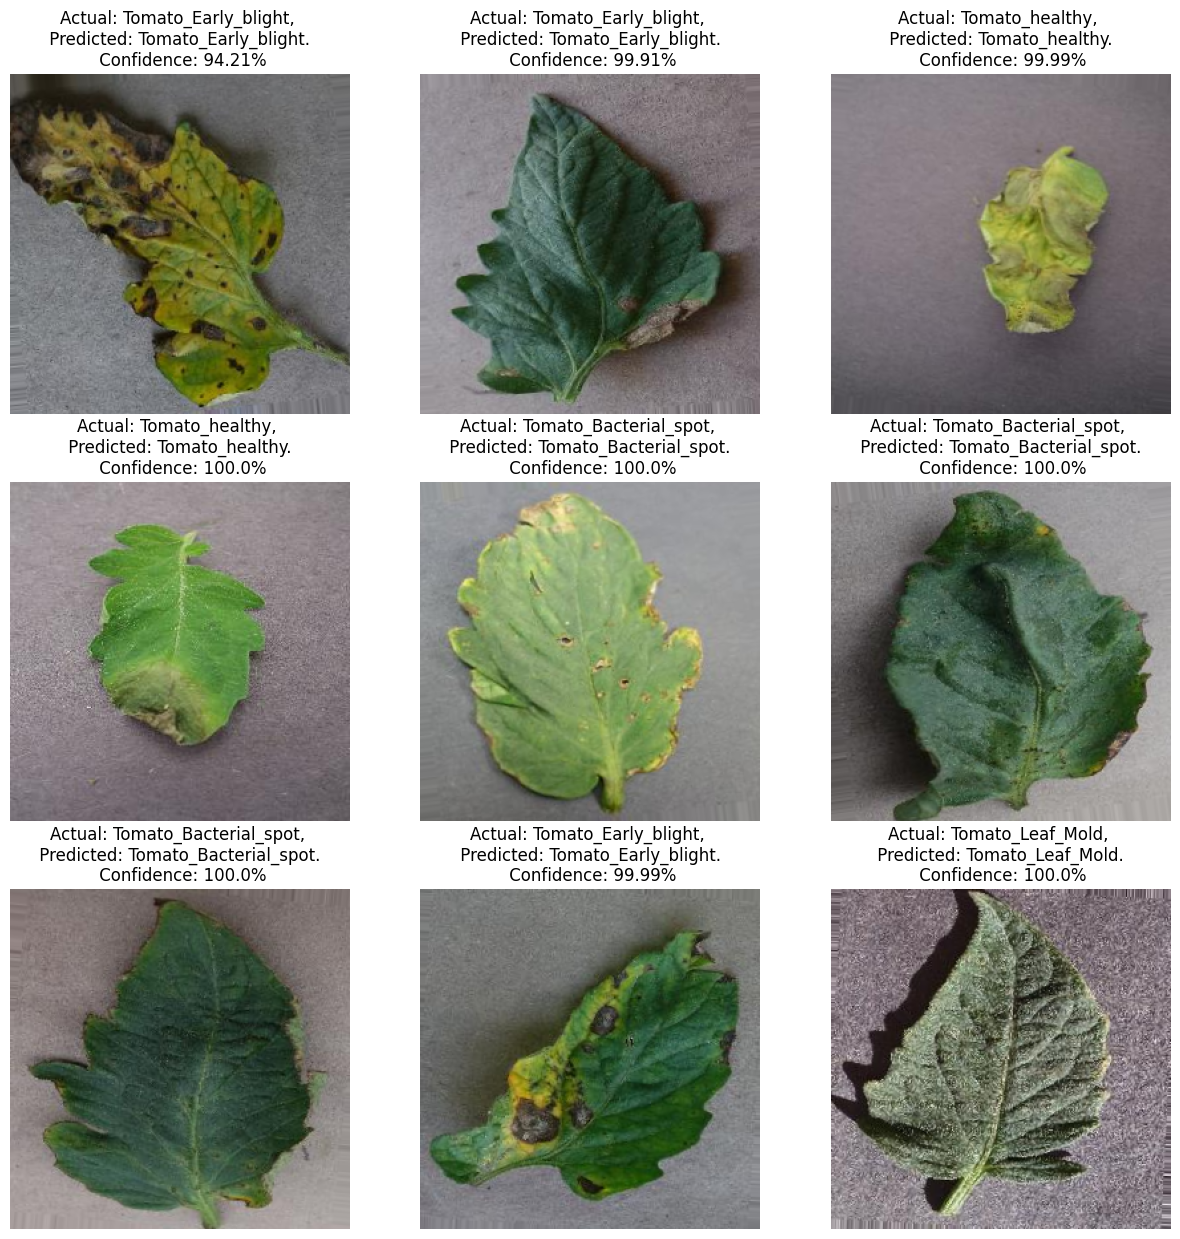

In [27]:
plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model,images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%')
        plt.axis('off')
    break

In [28]:
model.save('../potatoes.h5')